<center> <h1> Costa Rican Poverty Predction </h1> </center>
<center> <h2> by: Jason Lin, Jason Lingle, and Jonathan Marin </h2> </center>
<center> <h2> 9/16/2018 </h2> </center>


# Business Understanding

The issue of poverty is an issue in even the wealthiest of countries such as the United States.  While countries have their own way of providing support to individuals in need, the issue of identifying people with the most needs is always an issue.  Many social programs have a hard time making sure the right people are given enough aid. It is especially difficult when a program focuses on the poorest segment of the population as they are unable to provide the income and expense records that are typically required for qualification.

In Latin America, a common method of verifying income qualification when income data is unavailable or unreliable is the Proxy Means Test (PMT).  With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling, or the assets found in the home to classify them and predict their level of need.  While this test is better at evaluating income needs over other methods, the accuracy of predicting income qualification remains a problem as the region’s population grows and poverty declines.

With this backdrop, our team has selected a data set called the “Costa Rican Household Poverty Level Prediction” from Kaggle.  The data set has been provided by the Inter-American Development Bank (IDB), which is the largest source of development financing for Latin American and Caribbean countries.  The goal of the IDB in providing this data set is to get support in improving income qualification for some of the world's poorest families for social welfare assistance in Latin America. (https://www.kaggle.com/c/costa-rican-household-poverty-prediction).  It is also their belief that new methods, beyond traditional econometrics, might be identified that could improve PMT performance.
The dataset is a file with household characteristics from a sample of Costa Rican households from an unknown year. The dataset has observations for each member of the household, but the classification is done at the household level. The target is an ordinal variable indicating groups of income levels:

•	1 = extreme poverty
•	2 = moderate poverty
•	3 = vulnerable households
•	4 = non-vulnerable households

The goal is to use the household characteristics provided and possibly create new features to predict the income levels using classification. Since the test set does not have the target variable, we will test the accuracy by submitting our predicted results to Kaggle.




In [2]:
import pandas as pd 
import numpy as np
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


train = pd.DataFrame(pd.read_csv("train.csv"))
test = pd.DataFrame(pd.read_csv("test.csv"))





# Data Meaning Type


Variable Name | Definition | Variable Type
--------------|------------|------------------|
v2a1 |  Monthly rent payment | float
hacdor |  =1 Overcrowding by bedrooms | bool
rooms |   number of all rooms in the house | int
hacapo |  =1 Overcrowding by rooms | bool
v14a |  =1 has bathroom in the household | bool
refrig |  =1 if the household has refrigerator | bool
v18q |  owns a tablet | bool
v18q1 |  number of tablets household owns | int
r4h1 |  Males younger than 12 years of age | int
r4h2 |  Males 12 years of age and older | int
r4h3 |  Total males in the household | int
r4m1 |  Females younger than 12 years of age | int
r4m2 |  Females 12 years of age and older | int
r4m3 |  Total females in the household | int
r4t1 |  persons younger than 12 years of age | int
r4t2 |  persons 12 years of age and older | int
r4t3 |  Total persons in the household | int
tamhog |  size of the household | int
tamviv |  number of persons living in the household | int
escolari |  years of schooling | int
rez_esc |  Years behind in school | int
hhsize |  household size | int
paredblolad |  =1 if predominant material on the outside wall is block or brick | bool
paredzocalo |  "=1 if predominant material on the outside wall is socket (wood   zinc or absbesto" | bool
paredpreb |  =1 if predominant material on the outside wall is prefabricated or cement | bool
pareddes |  =1 if predominant material on the outside wall is waste material | bool
paredmad |  =1 if predominant material on the outside wall is wood | bool
paredzinc |  =1 if predominant material on the outside wall is zink | bool
paredfibras |  =1 if predominant material on the outside wall is natural fibers | bool
paredother |  =1 if predominant material on the outside wall is other | bool
pisomoscer |  "=1 if predominant material on the floor is mosaic, ceramic, terrzo | bool
pisocemento |  =1 if predominant material on the floor is cement | bool
pisoother |  =1 if predominant material on the floor is other | bool
pisonatur |  =1 if predominant material on the floor is  natural material | bool
pisonotiene |  =1 if no floor at the household | bool
pisomadera |  =1 if predominant material on the floor is wood | bool
techozinc |  =1 if predominant material on the roof is metal foil or zink | bool
techoentrepiso |  "=1 if predominant material on the roof is fiber cement   mezzanine | bool
techocane |  =1 if predominant material on the roof is natural fibers | bool
techootro |  =1 if predominant material on the roof is other | bool
cielorazo |  =1 if the house has ceiling | bool
abastaguadentro |  =1 if water provision inside the dwelling | bool
abastaguafuera |  =1 if water provision outside the dwelling | bool
abastaguano |  =1 if no water provision | bool
public |  "=1 electricity from CNFL   ICE  ESPH/JASEC | bool
planpri |  =1 electricity from private plant | bool
noelec |  =1 no electricity in the dwelling | bool
coopele |  =1 electricity from cooperative | bool
sanitario1 |  =1 no toilet in the dwelling | bool
sanitario2 |  =1 toilet connected to sewer or cesspool | bool
sanitario3 |  =1 toilet connected to  septic tank | bool
sanitario5 |  =1 toilet connected to black hole or letrine | bool
sanitario6 |  =1 toilet connected to other system | bool
energcocinar1 |  =1 no main source of energy used for cooking (no kitchen) | bool
energcocinar2 |  =1 main source of energy used for cooking electricity | bool
energcocinar3 |  =1 main source of energy used for cooking gas | bool
energcocinar4 |  =1 main source of energy used for cooking wood charcoal | bool
elimbasu1 |  =1 if rubbish disposal mainly by tanker truck | bool
elimbasu2 |  =1 if rubbish disposal mainly by botan hollow or buried | bool
elimbasu3 |  =1 if rubbish disposal mainly by burning | bool
elimbasu4 |  =1 if rubbish disposal mainly by throwing in an unoccupied space | bool
elimbasu5 |  "=1 if rubbish disposal mainly by throwing in river | bool
elimbasu6 |  =1 if rubbish disposal mainly other | bool
epared1 |  =1 if walls are bad | bool
epared2 |  =1 if walls are regular | bool
epared3 |  =1 if walls are good | bool
etecho1 |  =1 if roof are bad | bool
etecho2 |  =1 if roof are regular | bool
etecho3 |  =1 if roof are good | bool
eviv1 |  =1 if floor are bad | bool
eviv2 |  =1 if floor are regular | bool
eviv3 |  =1 if floor are good | bool
dis |  =1 if disable person | bool
male |  =1 if male | bool
female |  =1 if female | bool
estadocivil1 |  =1 if less than 10 years old | bool
estadocivil2 |  =1 if free or coupled uunion | bool
estadocivil3 |  =1 if married | bool
estadocivil4 |  =1 if divorced | bool
estadocivil5 |  =1 if separated | bool
estadocivil6 |  =1 if widow/er | bool
estadocivil7 |  =1 if single | bool
parentesco1 |  =1 if household head | bool
parentesco2 |  =1 if spouse/partner | bool
parentesco3 |  =1 if son/doughter | bool
parentesco4 |  =1 if stepson/doughter | bool
parentesco5 |  =1 if son/doughter in law | bool
parentesco6 |  =1 if grandson/doughter | bool
parentesco7 |  =1 if mother/father | bool
parentesco8 |  =1 if father/mother in law | bool
parentesco9 |  =1 if brother/sister | bool
parentesco10 |  =1 if brother/sister in law | bool
parentesco11 |  =1 if other family member | bool
parentesco12 |  =1 if other non family member | bool
idhogar |  Household level identifier | string
hogar_nin |  Number of children 0 to 19 in household | int
hogar_adul |  Number of adults in household | int
hogar_mayor |  # of individuals 65+ in the household | int
hogar_total |  # of total individuals in the household | int
dependency |  Dependency rate,  calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64) | numeric
edjefe |  years of education of male head of household,  based on the interaction of escolari (years of education)  head of household and gender,  yes=1 and no=0 | bool
edjefa |  years of education of female head of household , based on the interaction of escolari (years of education) , head of household and gender,  yes=1 and no=0 | bool
meaneduc | average years of education for adults (18+) | int
instlevel1 |  =1 no level of education | bool
instlevel2 |  =1 incomplete primary | bool
instlevel3 |  =1 complete primary | bool
instlevel4 |  =1 incomplete academic secondary level | bool
instlevel5 |  =1 complete academic secondary level | bool
instlevel6 |  =1 incomplete technical secondary level | bool
instlevel7 |  =1 complete technical secondary level | bool
instlevel8 |  =1 undergraduate and higher education | bool
instlevel9 |  =1 postgraduate higher education | bool
bedrooms |  number of bedrooms | int
overcrowding |  # persons per room | int
tipovivi1 |  =1 own and fully paid house | bool
tipovivi2 |  "=1 own paying in installments | bool
tipovivi3 |  =1 rented | bool
tipovivi4 |  =1 precarious | bool
tipovivi5 |  "=1 other(assigned   borrowed)" | bool
computer |  =1 if the household has notebook or desktop computer | bool
television |  =1 if the household has TV | bool
mobilephone |  =1 if mobile phone | bool
qmobilephone |  # of mobile phones | int
lugar1 |  =1 region Central | bool
lugar2 |  =1 region Chorotega | bool
lugar3 |  =1 region PacÃƒÂ­fico central | bool
lugar4 |  =1 region Brunca | bool
lugar5 |  =1 region Huetar AtlÃƒÂ¡ntica | bool
lugar6 |  =1 region Huetar Norte | bool
area1 |  =1 zona urbana | bool
area2 |  =2 zona rural | bool
age |  Age in years | int
SQBescolari |  escolari squared | numeric
SQBage |  age squared | numeric
SQBhogar_total |  hogar_total squared | int
SQBedjefe |  edjefe squared | int
SQBhogar_nin |  hogar_nin squared | int
SQBovercrowding |  overcrowding squared | float
SQBdependency |  dependency squared | float
SQBmeaned |  square of the mean years of education of adults (>=18) in the household | bool
agesq |  Age squared | numeric





# Data Quality



## Missing Data (NaNs)

### v2a1
This variable represents the Monthly Rent Payment.  This may be null because there is no monthly rent payment as the subjet may own the house in full (variable:tipovivi1).  When the home is owened in full, we populated the monthly payment as $0 instead of null.  However, there are blanks still in train and test after doing so.  It may be possible to build a prelimanary model to impute this with all the household and location characteristics that we already have, however, we have imputed the rest with the mean for the remaining nulls. 


### v18q1        
This variable represents the number of people who own a tablet.  This is a member level variable and the imputation of this will be handled by the aggregation to household level.  We believe that the nulls here represent zero. 

### rez_esc
This variable represents the number of years a member is behind in school.  This is a member level variable and the imputation of this will be hangled by the aggregation to household level.  We beleive that the nulls here represent zero. 

### meaneduc       

This variable represents the average years of education adults (18+) have.  This is a household level variable.  We have imputed this by taking the number of years of eduction from the head of household males/females.  

### SQBmeaned       

This variable is the square of meaneduc which was null for the same columns that the meaneduc was null for.  This was calculated by squaring the imputed meaneduc. 


## Outliers

The plan is to run a random forest model which is not sensitive to outliers.  We will skip the outlier analysis for now. In feature modeling, it is easier to point out the outliers because of cross correlation and other factors. 

## Errors

The kaggle competition rules mentioned that the scoring only occurs on head of household, but member level data was provided.  We have found member level data tied to households that had no head of household.  These were excluded from the study since they will not be scored in the test set per kaggle rules. 

Also, meaneduc and SQBmeaned were not populated even though we had information on head of household education. 


## Denormalization 

Some variables of the dataset is at the member level and we are provided a key (variable: idhogar) that ties the member to the household.  The target should be the same between all members of the household.  If it is different, it is an error and we should use the head of household (variable: parentesco1) target. Note that the scoring on the test set within the kaggle competition is only done for heads of household.  The member level was provided for additional feature engineering. 

To overcome this, the plan would be to denormalize the data by head of household for both train and test for heads of household. Then, we will need to backfill the expected test set submission as it is expected to be submitted at the member level even though it is only scoring at the household level.  We believe that we can leave the members that are not heads of household blank in the submission according to what was stated in the kaggle submission selection.  


Data Attributes spreadsheet was created to show attributes and member level or household level.  Variables were reviewed to assign each category appropriately.  For some fields, it was a simple sum, but for others, we created bins for the column and then summed.  





In [3]:

#Find the Nulls
null_columns=train.columns[train.isnull().any()]

train[null_columns].isnull().sum()

v2a1       6860
v18q1      7342
rez_esc    7928
dtype: int64

In [4]:
# Update and Check to see we updated

# There are 2156 null values for v2a1 (monthly mortgage payment).  After accounting for those that don't 
#rent, we are left with 300 values that have nulls.  We can try to create a model 

train.loc[(train.tipovivi1 == 1),'v2a1'] = 0
test.loc[(test.tipovivi1 == 1),'v2a1'] = 0


train.loc[np.isnan(train["v18q1"]), 'v18q1'] = 0
test.loc[np.isnan(test["v18q1"]), 'v18q1'] = 0

train.loc[np.isnan(train["v18q1"]), 'v18q1'] = 0
test.loc[np.isnan(test["v18q1"]), 'v18q1'] = 0


train.loc[(train.dependency == "yes"),'dependency'] = 1
train.loc[(train.dependency == "no"),'dependency'] = 0

test.loc[(test.dependency == "yes"),'dependency'] = 1
test.loc[(test.dependency == "no"),'dependency'] = 0


train.loc[(train.edjefe == "yes"),'edjefe'] = 1
train.loc[(train.edjefe == "no"),'edjefe'] = 0

test.loc[(test.edjefe == "yes"),'edjefe'] = 1
test.loc[(test.edjefe == "no"),'edjefe'] = 0



train.loc[(train.edjefa == "yes"),'edjefa'] = 1
train.loc[(train.edjefa == "no"),'edjefa'] = 0

test.loc[(test.edjefa == "yes"),'edjefa'] = 1
test.loc[(test.edjefa == "no"),'edjefa'] = 0


null_columns=train.columns[train.isnull().any()]

train[null_columns].isnull().sum()


v2a1        949
rez_esc    7928
dtype: int64

In [5]:
#Denormalization

#Create subset dataframes for head of househoold for tain and test
train_head = train[['idhogar', 'parentesco1', 'Id', 'hhsize', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q1', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'bedrooms', 'overcrowding', 'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 'computer', 'television', 'qmobilephone', 'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'SQBescolari', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned','Target']]

train_head = train_head[train_head['parentesco1'] == 1]

test_head = test[['idhogar', 'parentesco1', 'Id', 'hhsize', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q1', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'bedrooms', 'overcrowding', 'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 'computer', 'television', 'qmobilephone', 'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'SQBescolari', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned']]

test_head = test_head[test_head['parentesco1'] == 1]

#Start the member level denormalization for train and test
train_member_agg = pd.DataFrame(sqldf("select  "
"idhogar, "
"sum(cast(v18q as int)) 'JM_Sum_of_Tablets', "
"sum(cast(escolari as int)) 'Total Sum Years of Schooling', "
"sum(case when escolari < 5 then 1 else 0 end) as 'JM_People_Educ_LT5', "
"sum(case when escolari < 10 then 1 else 0 end) as 'JM_People_Educ_LT10', "
"sum(case when escolari < 15 then 1 else 0 end) as 'JM_People_Educ_LT15', "
"sum(case when escolari < 20 then 1 else 0 end) as 'JM_People_Educ_LT20', "
"sum(case when escolari < 25 then 1 else 0 end) as 'JM_People_Educ_LT25', "
"sum(case when rez_esc = 1 then 1 else 0 end) as 'JM_1YrBehindSchool', "
"sum(case when rez_esc = 2 then 1 else 0 end) as 'JM_2YrBehindSchool', "
"sum(case when rez_esc = 3 then 1 else 0 end) as 'JM_3YrBehindSchool', "
"sum(case when rez_esc = 4 then 1 else 0 end) as 'JM_4YrBehindSchool', "
"sum(case when rez_esc = 5 then 1 else 0 end) as 'JM_5YrBehindSchool', "
"sum(cast(dis as int)) as 'JM_Sum_of_Disabled', "
"sum(cast(male as int)) as 'JM_Sum_Of_Males', "
"sum(cast(female as int)) as 'JM_Sum_Of_Females', "
"sum(cast(estadocivil1 as int)) as  'JM_estadocivil1', "
"sum(cast(estadocivil2 as int)) as  'JM_estadocivil2', "
"sum(cast(estadocivil3 as int)) as  'JM_estadocivil3', "
"sum(cast(estadocivil4 as int)) as  'JM_estadocivil4', "
"sum(cast(estadocivil5 as int)) as  'JM_estadocivil5', "
"sum(cast(estadocivil6 as int)) as  'JM_estadocivil6', "
"sum(cast(estadocivil7 as int)) as  'JM_estadocivil7', "
"sum(cast(parentesco1 as int)) as  'JM_parentesco1', "
"sum(cast(parentesco2 as int)) as  'JM_parentesco2', "
"sum(cast(parentesco3 as int)) as  'JM_parentesco3', "
"sum(cast(parentesco4 as int)) as  'JM_parentesco4', "
"sum(cast(parentesco5 as int)) as  'JM_parentesco5', "
"sum(cast(parentesco6 as int)) as  'JM_parentesco6', "
"sum(cast(parentesco7 as int)) as  'JM_parentesco7', "
"sum(cast(parentesco8 as int)) as  'JM_parentesco8', "
"sum(cast(parentesco9 as int)) as  'JM_parentesco9', "
"sum(cast(parentesco10 as int)) as  'JM_parentesco10', "
"sum(cast(parentesco11 as int)) as  'JM_parentesco11', "
"sum(cast(parentesco12 as int)) as  'JM_parentesco12', "
"sum(cast(instlevel1 as int)) as  'JM_instlevel1', "
"sum(cast(instlevel2 as int)) as  'JM_instlevel2', "
"sum(cast(instlevel3 as int)) as  'JM_instlevel3', "
"sum(cast(instlevel4 as int)) as  'JM_instlevel4', "
"sum(cast(instlevel5 as int)) as  'JM_instlevel5', "
"sum(cast(instlevel6 as int)) as  'JM_instlevel6', "
"sum(cast(instlevel7 as int)) as  'JM_instlevel7', "
"sum(cast(instlevel8 as int)) as  'JM_instlevel8', "
"sum(cast(instlevel9 as int)) as  'JM_instlevel9', "
"sum(cast(mobilephone as int)) as  'JM_mobilephone'" 
"from train "
"group by idhogar "
))



test_member_agg = pd.DataFrame(sqldf("select  "
"idhogar, "
"sum(cast(v18q as int)) 'JM_Sum_of_Tablets', "
"sum(cast(escolari as int)) 'Total Sum Years of Schooling', "
"sum(case when escolari < 5 then 1 else 0 end) as 'JM_People_Educ_LT5', "
"sum(case when escolari < 10 then 1 else 0 end) as 'JM_People_Educ_LT10', "
"sum(case when escolari < 15 then 1 else 0 end) as 'JM_People_Educ_LT15', "
"sum(case when escolari < 20 then 1 else 0 end) as 'JM_People_Educ_LT20', "
"sum(case when escolari < 25 then 1 else 0 end) as 'JM_People_Educ_LT25', "
"sum(case when rez_esc = 1 then 1 else 0 end) as 'JM_1YrBehindSchool', "
"sum(case when rez_esc = 2 then 1 else 0 end) as 'JM_2YrBehindSchool', "
"sum(case when rez_esc = 3 then 1 else 0 end) as 'JM_3YrBehindSchool', "
"sum(case when rez_esc = 4 then 1 else 0 end) as 'JM_4YrBehindSchool', "
"sum(case when rez_esc = 5 then 1 else 0 end) as 'JM_5YrBehindSchool', "
"sum(cast(dis as int)) as 'JM_Sum_of_Disabled', "
"sum(cast(male as int)) as 'JM_Sum_Of_Males', "
"sum(cast(female as int)) as 'JM_Sum_Of_Females', "
"sum(cast(estadocivil1 as int)) as  'JM_estadocivil1', "
"sum(cast(estadocivil2 as int)) as  'JM_estadocivil2', "
"sum(cast(estadocivil3 as int)) as  'JM_estadocivil3', "
"sum(cast(estadocivil4 as int)) as  'JM_estadocivil4', "
"sum(cast(estadocivil5 as int)) as  'JM_estadocivil5', "
"sum(cast(estadocivil6 as int)) as  'JM_estadocivil6', "
"sum(cast(estadocivil7 as int)) as  'JM_estadocivil7', "
"sum(cast(parentesco1 as int)) as  'JM_parentesco1', "
"sum(cast(parentesco2 as int)) as  'JM_parentesco2', "
"sum(cast(parentesco3 as int)) as  'JM_parentesco3', "
"sum(cast(parentesco4 as int)) as  'JM_parentesco4', "
"sum(cast(parentesco5 as int)) as  'JM_parentesco5', "
"sum(cast(parentesco6 as int)) as  'JM_parentesco6', "
"sum(cast(parentesco7 as int)) as  'JM_parentesco7', "
"sum(cast(parentesco8 as int)) as  'JM_parentesco8', "
"sum(cast(parentesco9 as int)) as  'JM_parentesco9', "
"sum(cast(parentesco10 as int)) as  'JM_parentesco10', "
"sum(cast(parentesco11 as int)) as  'JM_parentesco11', "
"sum(cast(parentesco12 as int)) as  'JM_parentesco12', "
"sum(cast(instlevel1 as int)) as  'JM_instlevel1', "
"sum(cast(instlevel2 as int)) as  'JM_instlevel2', "
"sum(cast(instlevel3 as int)) as  'JM_instlevel3', "
"sum(cast(instlevel4 as int)) as  'JM_instlevel4', "
"sum(cast(instlevel5 as int)) as  'JM_instlevel5', "
"sum(cast(instlevel6 as int)) as  'JM_instlevel6', "
"sum(cast(instlevel7 as int)) as  'JM_instlevel7', "
"sum(cast(instlevel8 as int)) as  'JM_instlevel8', "
"sum(cast(instlevel9 as int)) as  'JM_instlevel9', "
"sum(cast(mobilephone as int)) as  'JM_mobilephone'" 
"from test "
"group by idhogar "
))



#Join the household and member aggregation together
train_model_set = pd.DataFrame(pd.merge(train_head, train_member_agg, on = 'idhogar', how = 'left'))
test_model_set = pd.DataFrame(pd.merge(test_head, test_member_agg, on = 'idhogar', how = 'left'))




# For the rest of the v2a1 that are null, we will use the mean

train_model_set['v2a1'].fillna((train_model_set['v2a1'].mean()), inplace=True)

test_model_set['v2a1'].fillna((train_model_set['v2a1'].mean()), inplace=True)

#Export final model csvs for review
train_model_set.to_csv("train_model_set.csv")
test_model_set.to_csv("test_model_set.csv")

#Make sure all Nulls are accounted for
null_columns=train_model_set.columns[train_model_set.isnull().any()]

train_model_set[null_columns].isnull().sum()






Series([], dtype: float64)

# Simple Statistics 



Requirement: 
Visualize appropriate statistics (e.g. range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially niteresting.  Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful. 

In [6]:
pd.options.display.float_format = '{:.2f}'.format

train_model_set.describe()





,parentesco1,hhsize,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q1,r4h1,...,JM_instlevel1,JM_instlevel2,JM_instlevel3,JM_instlevel4,JM_instlevel5,JM_instlevel6,JM_instlevel7,JM_instlevel8,JM_instlevel9,JM_mobilephone
count,2973.00,2973.00,2973.00,2973.00,2973.00,2973.00,2973.00,2973.00,2973.00,2973.00,...,2973.00,2973.00,2973.00,2973.00,2973.00,2973.00,2973.00,2973.00,2973.00,2973.00
mean,1.00,3.21,51596.37,0.02,4.79,0.01,0.99,0.95,0.30,0.26,...,0.43,0.54,0.67,0.60,0.36,0.06,0.05,0.45,0.05,3.13
std,0.00,1.59,111678.84,0.14,1.45,0.11,0.08,0.21,0.66,0.56,...,0.72,0.78,0.84,0.83,0.63,0.26,0.24,0.75,0.24,1.67
min,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,0.00,0.00,4.00,0.00,1.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
50%,1.00,3.00,0.00,0.00,5.00,0.00,1.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
75%,1.00,4.00,51596.37,0.00,6.00,0.00,1.00,1.00,0.00,0.00,...,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,4.00
max,1.00,13.00,2353477.00,1.00,11.00,1.00,1.00,1.00,6.00,5.00,...,5.00,5.00,7.00,5.00,4.00,3.00,3.00,5.00,2.00,13.00


# Visualize Attributes



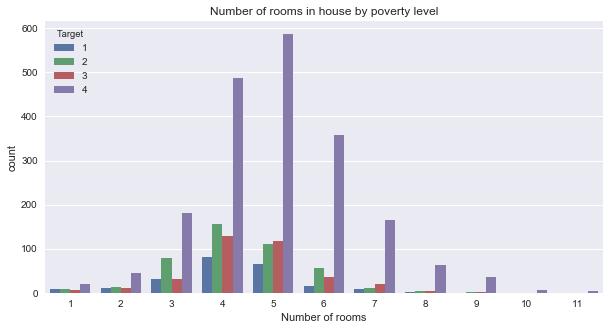

In [7]:
# Number of rooms by poverty level
train_by_hhid = train_model_set.groupby('idhogar')
rm_by_id = train_by_hhid['Target', 'rooms'].first()
plt.figure(figsize=(10, 5));
sns.countplot(x='rooms', hue='Target', data=rm_by_id);
plt.title('Number of rooms in house by poverty level');
plt.xlabel('Number of rooms');








The first variable that we looked at is the total number of rooms in the individual's house.  We have aggregated by household to ensure that there is no double counting of homes.  The most common number of rooms for people that are not vulnerable is 5 rooms while the number of rooms for the most vulnerable (extreme, moderate, and vulnerable to poverty) households is 4 rooms.  Very few households experiencing poverty or vulnerable have more than 5 rooms.


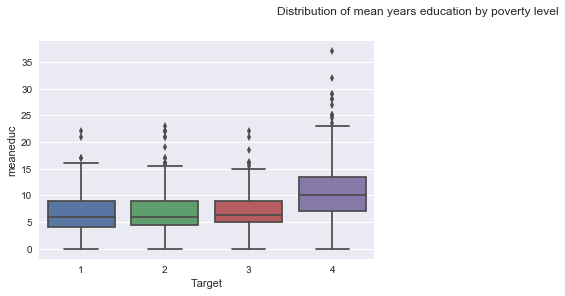

In [8]:

# Box plot of Education by poverty level
fig, (ax1) = plt.subplots(1); sns.boxplot(x='Target', y='meaneduc', data=train_model_set, ax=ax1); 
fig.suptitle('Distribution of mean years education by poverty level', x=1, y=1, multialignment = 'center');





There is very little distinction in mean years of education in the target groups that are extreme, moderate, or are vulnerable with the mean  of each roughly around 5.  Meanwhile, those who are not vulnerable have a mean of roughly 10.


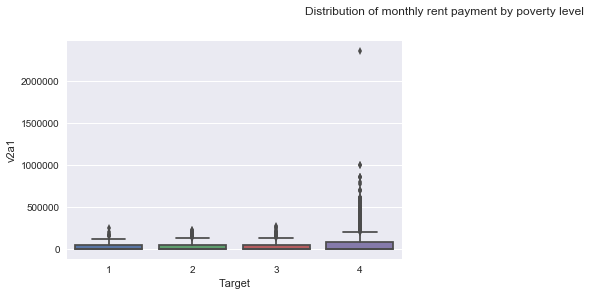

In [9]:
# Box plot of monthly rent payment by poverty level
fig, (ax1) = plt.subplots(1); sns.boxplot(x='Target', y='v2a1', data=train_model_set, ax=ax1); 
fig.suptitle('Distribution of monthly rent payment by poverty level', x=1, y=1);

Similar to mean years of education, there is not a significant difference in mean monthly rent for the target groups that are extreme, moderate, or are vulnerable, but there is a wider range of rent in the moderate and vulnerable groups.  Also, the non-vulnerable group appears to have a higher rent than the other groups.

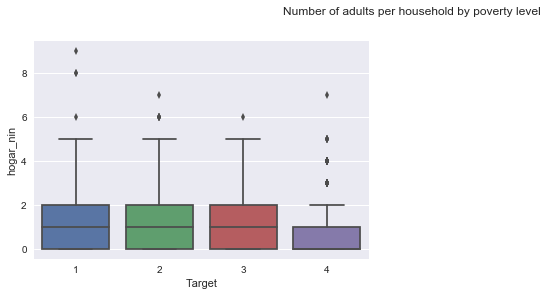

In [10]:
# Box Plot of Total Number of adults per household
fig, (ax1) = plt.subplots(1); sns.boxplot(x='Target', y='hogar_nin', data=train_model_set, ax=ax1); 
fig.suptitle('Number of adults per household by poverty level', x=1, y=1);


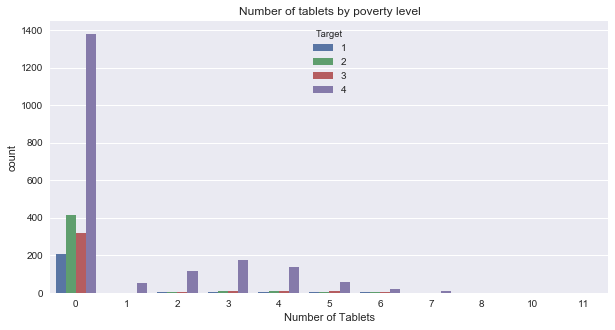

In [11]:
# Numbers of Tablets by poverty level
tablets_by_id = train_by_hhid['Target', 'JM_Sum_of_Tablets'].first()
plt.figure(figsize=(10, 5));
sns.countplot(x='JM_Sum_of_Tablets', hue='Target', data= tablets_by_id);
plt.title('Number of tablets by poverty level');
plt.xlabel('Number of Tablets');


In reviewing the number of tablets by poverty level per household, the majority of households with extreme, moderate, and vulnerable to poverty groups have zero tablets.  While the majority of households that are not vulnerable to poverty also have no tablets, households that have one or more tablet are almost exclusively not vulnerable to poverty.

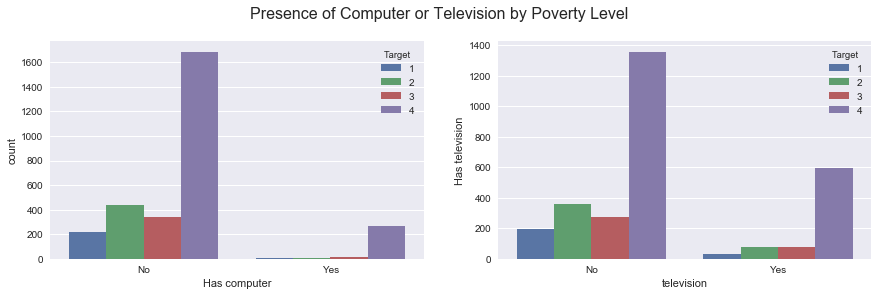

In [12]:
# Presence of computer or television by poverty level
comp_tv_by_id = train_by_hhid['Target', 'computer', 'television'].first()
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.countplot(x='computer', hue='Target', data=comp_tv_by_id, ax=ax1);
sns.countplot(x='television', hue='Target', data=comp_tv_by_id, ax=ax2);
ax1.set_xticklabels(['No', 'Yes']);
ax2.set_xticklabels(['No', 'Yes']);
ax1.set_xlabel('Has computer');
ax2.set_ylabel('Has television');
fig.subplots_adjust(left=0.1, right=2)
fig.suptitle('Presence of Computer or Television by Poverty Level', x=1, y=1, fontsize=16);


There does not appear to be a significant distinction in the households that do not have a computer relative to the level of poverty.  On the other hand, few households that are in the target groups 1 through 3 while there is a significantly higher number of households that have a computer that are not vulnerable.

There is a similar distribution of households with a television relative to those that have a computer.  There does not appear to be a significant distinction in the households that do not have a television relative to the level of poverty.  On the other hand, few households that are in the target groups 1 through 3 while there is a significantly higher number of households that have a television that are not vulnerable.

# Explore Joint Attributes

Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classsification). 

       Target  dependency    r4m3  hogar_nin  tipovivi3    r4t3    r4h3
count 2973.00     2973.00 2973.00    2973.00    2973.00 2973.00 2973.00
mean     3.36        1.33    1.67       0.97       0.18    3.22    1.56
std      0.99        2.15    1.07       1.16       0.38    1.59    1.06
min      1.00        0.00    0.00       0.00       0.00    1.00    0.00
25%      3.00        0.00    1.00       0.00       0.00    2.00    1.00
50%      4.00        0.50    1.00       1.00       0.00    3.00    1.00
75%      4.00        1.00    2.00       2.00       0.00    4.00    2.00
max      4.00        8.00    8.00       9.00       1.00   13.00    8.00
Target
1   1.56
2   1.82
3   1.95
4   1.09
Name: dependency, dtype: float64


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


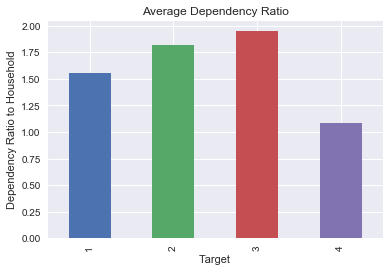

In [13]:
train_intvars = train_model_set[['Target','dependency','r4m3','hogar_nin','tipovivi3','r4t3','r4h3']]
train_intvars['dependency'] = train_intvars['dependency'].astype(np.float64)
print(train_intvars.describe())

dependency_group = train_intvars.groupby(by=['Target'])
average_dependency=dependency_group.dependency.mean()
ax = average_dependency.plot(kind='bar')
plt.ylabel('Dependency Ratio to Household')
plt.title('Average Dependency Ratio')
print(average_dependency)


When looking at the average dependency ratio for each poverty level, we see that poverty levels 1 to 3 are higher than 4. The trend seems to indiciate that people of less poverty have lower number of depencies compared to higher poverty levels. This could indicate that the management of money is spread out more thinly because of higher number of dependents.

Target
1     441
2     831
3     636
4    3045
Name: r4m3, dtype: int64
Target
1   0.57
2   0.53
3   0.53
4   0.50
dtype: float64


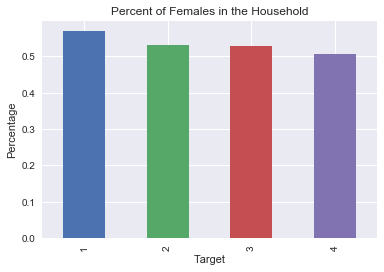

In [14]:
females_hh = train_intvars.groupby(by=['Target'])
female_total = females_hh.r4m3.sum() 
female_pct=females_hh.r4m3.sum() / females_hh.r4t3.sum()
fx = female_pct.plot(kind='bar')
plt.ylabel('Percentage')
plt.title('Percent of Females in the Household')

print(female_total)
print(female_pct)

When looking at the number of females in a given household as a percentage, we see that the trend is going downwards as the poverty level decreases. This could indicate that females may have obstacles in terms of obtaining meaningful income if there is such as high number of females percentage wise in the lower income levels.

Target
1     334
2     732
3     570
4    2989
Name: r4h3, dtype: int64
Target
1   0.43
2   0.47
3   0.47
4   0.50
dtype: float64


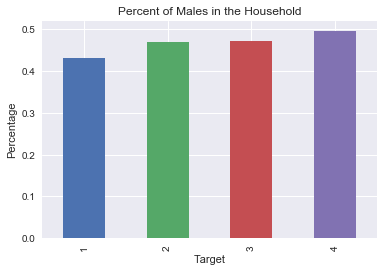

In [15]:
males_hh = train_intvars.groupby(by=['Target'])
male_total = males_hh.r4h3.sum()
male_pct=males_hh.r4h3.sum() / males_hh.r4t3.sum()
mx = male_pct.plot(kind='bar')
plt.ylabel('Percentage')
plt.title('Percent of Males in the Household')
print(male_total)
print(male_pct)

Looking at the number of males based on percentage of household, we can see an upward trend as poverty level increases. This seems to show that males have less obstacles in obtaining meaningful income. When looking at the graph for male and female percentages, we see that the story shows there could be disparity between males and females.

Target
1   1.32
2   1.14
3   1.12
4   1.02
dtype: float64


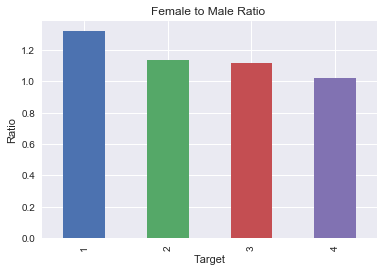

In [16]:
fm_ratio = train_intvars.groupby(by=['Target'])
fm_ratio_comp=fm_ratio.r4m3.sum() / fm_ratio.r4h3.sum()
fmx = fm_ratio_comp.plot(kind='bar')
plt.ylabel('Ratio')
plt.title('Female to Male Ratio ')
print(fm_ratio_comp)

When looking at the female to male ratio, this further shows the disparity in poverty between females and males. Seeing that females are of higher ratio in the poverty level 1, shows that there could issues in income disparity or adverse selection against females in the workforce.

Target
1   3.49
2   3.54
3   3.40
4   3.09
Name: r4t3, dtype: float64


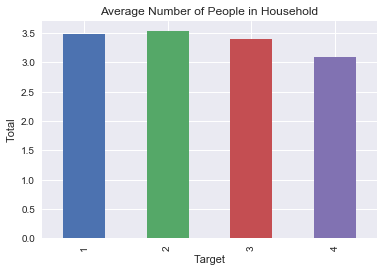

In [17]:
household_ppl = train_intvars.groupby(by=['Target'])
household_cnt=household_ppl.r4t3.mean()
hx = household_cnt.plot(kind='bar')
plt.ylabel('Total')
plt.title('Average Number of People in Household')

print(household_cnt)

The average of number of households decreases as poverty level decreases going for 3.49 to 3.09. This seems to go hand in hand with the dependency relationship stated earlier, indicating that larger households could indicate more dependents meaning less individuals who can share the cost of the household.

Target
1     35
2     73
3     56
4    373
Name: tipovivi3, dtype: int64
Target
1   0.05
2   0.05
3   0.05
4   0.06
dtype: float64


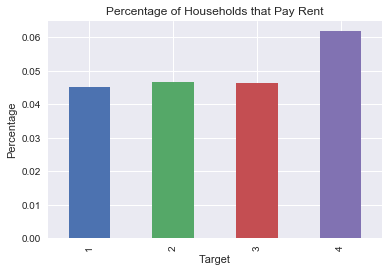

In [18]:
rent = train_intvars.groupby(by=['Target'])
rent_cnt=rent.tipovivi3.sum()/rent.r4t3.sum()
rent_count = rent.tipovivi3.sum()
rx = rent_cnt.plot(kind='bar')
plt.ylabel('Percentage')
plt.title('Percentage of Households that Pay Rent')

print(rent_count)
print(rent_cnt)

When looking at the percentage of households that pay rent, we see that the lower poverty levels have more households that pay rent. This seems to show that people of higher poverty levels are not able to afford the rent or already own a house. This could also be an indicator that these households may not have a shelter to live since rent cannot be afforded.

Target
1     775
2    1563
3    1206
4    6034
Name: r4t3, dtype: int64
Target
1     354
2     634
3     418
4    1469
Name: hogar_nin, dtype: int64
Target
1   0.46
2   0.41
3   0.35
4   0.24
dtype: float64


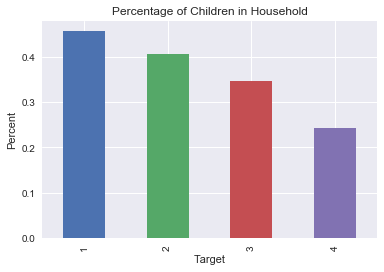

In [19]:
child = train_intvars.groupby(by=['Target'])
child_pct=child.hogar_nin.sum()/child.r4t3.sum()
child_cnt = child.hogar_nin.sum()
ppl = child.r4t3.sum()
cctx = child_pct.plot(kind='bar')
plt.ylabel('Percent')
plt.title('Percentage of Children in Household')

print(ppl)
print(child_cnt)
print(child_pct)

The percentage of children in the household is a further breakdown of dependencies, since dependencies can include old and young. The trend seems to be a downward trend as poverty level decreases. This also shows that a large percentage of individuals for dependencies are children. This could help determine where the large cost of household is concentrated on.

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


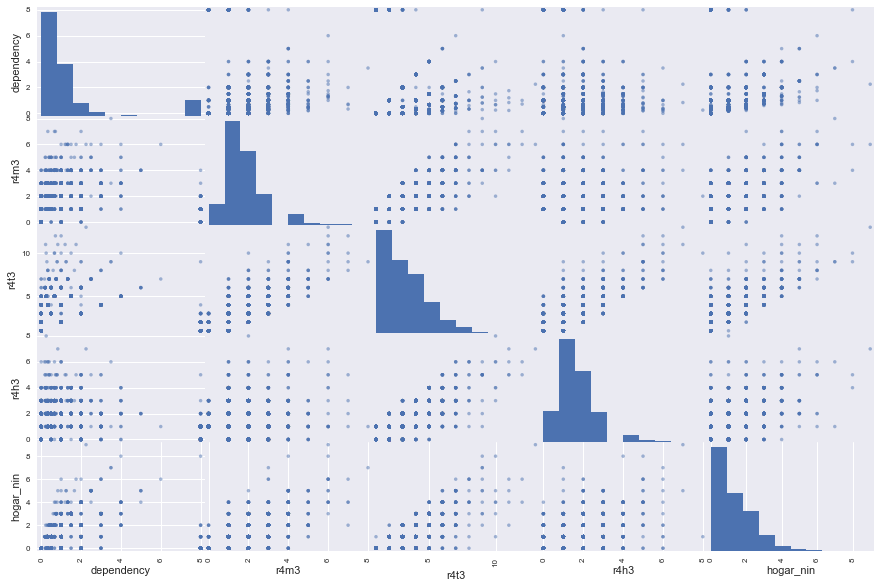

In [20]:
from pandas.tools.plotting import scatter_matrix
btw_intvars = train_model_set[['dependency','r4m3','r4t3','r4h3','hogar_nin']]
btw_intvars['dependency'] = btw_intvars['dependency'].astype(np.float64)
sx = scatter_matrix(btw_intvars,figsize=(15, 10))

The scatterplot and histrogram matrix is to see if there is any interesting correlations between the explanatory variables given earlier in the analysis. When looking at the scatterplots, we can see that there is some type of relationship between number of children (hogar_nin) and total number of females (r4m3) and total number of household (r4t3). They all show a positive relationship between the three variables. The number of children (hogar_nin) and dependency also show a positive relationship between the two variables. The total number of household all show a positive relationship between the total number of females, total number of males, total of number of children, and dependency. These correlations are to be kept in mind when looking at regression modeling since there could be residual issues when using highly correlated variables. When looking at the histograms, we can see that they are left skewed. This seems to show that the variables have higher counts near the lower end of the scale indicating lower number of dependicies, children, etc..

# New Features 

New Field Name|Definition|Variable Type
--------------------------------------------------------|----------|--------------|
JM_1YrBehindSchool|Count of individuals when rez_esc Count of  1|int
JM_2YrBehindSchool|Count of individuals when rez_esc Count of  2|int
JM_3YrBehindSchool|Count of individuals when rez_esc Count of  3|int
JM_4YrBehindSchool|Count of individuals when rez_esc Count of  4|int
JM_5YrBehindSchool|Count of individuals when rez_esc Count of  5|int
JM_estadocivil1| Count of children 1 if less than 10 years old|int
JM_estadocivil2| Count of people if free or coupled uunion|int
JM_estadocivil3| Count of people if married|int
JM_estadocivil4| Count of people if divorced|int
JM_estadocivil5| Count of people if separated|int
JM_estadocivil6| Count of people if widow/er|int
JM_estadocivil7| Count of people if single|int
JM_instlevel1| Count of people no level of education|int
JM_instlevel2| Count of people incomplete primary|int
JM_instlevel3| Count of people complete primary|int
JM_instlevel4| Count of people incomplete academic secondary level|int
JM_instlevel5| Count of people complete academic secondary level|int
JM_instlevel6| Count of people incomplete technical secondary level|int
JM_instlevel7| Count of people complete technical secondary level|int
JM_instlevel8| Count of people undergraduate and higher education|int
JM_instlevel9| Count of people postgraduate higher education|int
JM_mobilephone| Count of people if mobile phone|int
JM_parentesco1| Count of people if household head|int
JM_parentesco10| Count of people if brother/sister in law|int
JM_parentesco11| Count of people if other family member|int
JM_parentesco12| Count of people if other non family member|int
JM_parentesco2| Count of people if spouse/partner|int
JM_parentesco3| Count of people if son/doughter|int
JM_parentesco4| Count of people if stepson/doughter|int
JM_parentesco5| Count of people if son/doughter in law|int
JM_parentesco6| Count of people if grandson/doughter|int
JM_parentesco7| Count of people if mother/father|int
JM_parentesco8| Count of people if father/mother in law|int
JM_parentesco9| Count of people if brother/sister|int
JM_People_Educ_LT10|Count of individuals when schooling (escolari) < 10|int
JM_People_Educ_LT15|Count of individuals when schooling (escolari) < 15|int
JM_People_Educ_LT20|Count of individuals when schooling (escolari) < 20|int
JM_People_Educ_LT25|Count of individuals when schooling (escolari) < 25|int
JM_People_Educ_LT5|Count of individuals when schooling (escolari) < 5|int
JM_Sum_of_Disabled|Sum of dis for total number of disabled individuals per household|int
JM_Sum_Of_Females|Sum of male for total number of females per household|int
JM_Sum_Of_Males|Sum of male for total number of males per household|int
JM_Sum_of_Tablets|Sum of v18q for total tablets per household|int
Total Sum Years of Schooling|Sum of escolari for total years of schooling per household|int




# Exceptional Work 

Exceptional work here I believe should go to the amount of data cleaning that needed to occur to get the dataset ready.  Denormalizaition was needed as the data was submitted at the member level, but the submission and model needs to occur at the household level.  This added a lot more complexity and intimacy with the data to do this correctly and we added 28 new features from this.  


# Create Models


In [21]:
#Dropping the Keys
train_model_set = train_model_set.drop('Id', axis = 1)
train_model_set = train_model_set.drop('idhogar', axis = 1)






In [22]:
#Obtain Dependent and Independent Variables

from sklearn.model_selection import train_test_split
X = train_model_set.drop('Target', axis = 1)
y = train_model_set.Target




In [ ]:
#Create train and test set from train

from sklearn.model_selection import ShuffleSplit


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [41]:
#Feature Selection 

#To Use Linear SVM, we need to reduce the number of features. Using feature selection.


from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=147,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_


In [23]:
#Running Logistic Regression

# run logistic regression and vary some parameters

from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt


lr_clf = LogisticRegression(C=1,  class_weight=None)
  
# train the reusable logisitc regression model on the training data
X_train2 = X_train.drop(['r4m3','r4t3','r4h3','v2a1','refrig','JM_Sum_of_Tablets','r4h1','r4h2','r4m2','r4t2','r4t3','tamhog','paredpreb','pareddes','paredfibras','paredother','pisomoscer','pisocemento',
                        'pisoother','pisonatur','techozinc','techoentrepiso','techootro','abastaguano','noelec','sanitario1','sanitario3','sanitario6','energcocinar2','elimbasu1','elimbasu2','elimbasu4','elimbasu5',
                         'epared1','etecho2','eviv1','hogar_nin','computer','parentesco1','JM_parentesco1'],axis=1)
X_test2= X_test.drop(['r4m3','r4t3','r4h3','v2a1','refrig','JM_Sum_of_Tablets','r4h1','r4h2','r4m2','r4t2','r4t3','tamhog','paredpreb','pareddes','paredfibras','paredother','pisomoscer','pisocemento',
                     'pisoother','pisonatur','techozinc','techoentrepiso','techootro','abastaguano','noelec','sanitario1','sanitario3','sanitario6','energcocinar2','elimbasu1','elimbasu2','elimbasu4','elimbasu5'
                     ,'epared1','etecho2','eviv1','hogar_nin','computer','parentesco1','JM_parentesco1'],axis=1)
lr_clf.fit(X_train2,y_train)  # train object
y_hat = lr_clf.predict(X_test2) # get test set precitions

# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)

print("accuracy", acc )
print("confusion matrix\n",conf)




accuracy 0.6957983193277311
confusion matrix
 [[  9  17   0  17]
 [  8  25   6  52]
 [  4   6   7  60]
 [  3   6   2 373]]


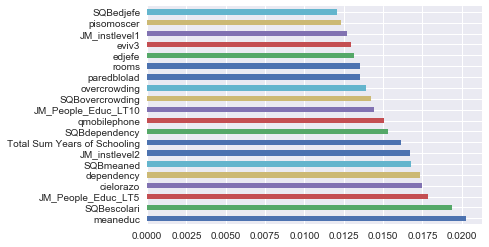

In [29]:

#SVM

from sklearn import svm

from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
X_train_sv = X_train[['meaneduc','JM_People_Educ_LT15','overcrowding','public']]
X_test_sv = X_test[['meaneduc','JM_People_Educ_LT15','overcrowding','public']]
scl_obj.fit(X_train_sv)

X_train_scaled = scl_obj.transform(X_train_sv)
X_test_scaled = scl_obj.transform(X_test_sv) 
svm_clf = svm.SVC(gamma='auto', C=100, kernel='linear')
svm_clf.fit(X_train_scaled, y_train)  

y_hat2 = svm_clf.predict(X_test_scaled)

acc = mt.accuracy_score(y_test,y_hat2)
conf = mt.confusion_matrix(y_test,y_hat2)

print("accuracy", acc )
print("confusion matrix\n",conf)


accuracy 0.645378151261
confusion matrix
 [[  0   0   0  43]
 [  0   0   0  91]
 [  0   0   0  77]
 [  0   0   0 384]]


In [24]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)

rf_clf.fit(X_train, y_train)


y_hat3 = rf_clf.predict(X_test)

acc = mt.accuracy_score(y_test,y_hat3)
conf = mt.confusion_matrix(y_test,y_hat3)

print("accuracy", acc )
print("confusion matrix\n",conf)

accuracy 0.690756302521
confusion matrix
 [[  7  13   1  22]
 [  5  28   5  53]
 [  1   9   7  60]
 [  1   9   5 369]]


# Model Advantages

Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.

# Interpret Feature Importance

Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?


In [25]:
#Logistic Regression Feature Importance
from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(X_train2)

X_train_scaled = scl_obj.transform(X_train2)
X_test_scaled = scl_obj.transform(X_test2) 

lr_clf = LogisticRegression(C=1,  class_weight=None)
lr_clf.fit(X_train_scaled,y_train)

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

#coeff = lr_clf.coef_

for num in range(4):
    zip_vars = zip(lr_clf.coef_[num].T,X_train2.columns) # combine attributes
    zip_vars = sorted(zip_vars)
    #print(zip_vars)
    for coef, name in zip_vars:
        print("model",num+1,"variable",name, 'has weight of', coef)
#print(zip_vars)
#print(coef)
#wtf - can't figure out how to sort this.  following example and it blows up. 
#zip_vars = sorted(zip_vars)

#for coef, name in zip_vars:
 #     for cnt in range(4):
  #      print(name, 'has weight of', coef[cnt])



accuracy: 0.694117647059
[[ 10  16   0  17]
 [  8  26   5  52]
 [  5   6   7  59]
 [  4   7   3 370]]
model 1 variable SQBovercrowding has weight of -0.516961600057
model 1 variable qmobilephone has weight of -0.51021643553
model 1 variable meaneduc has weight of -0.50259009367
model 1 variable hogar_adul has weight of -0.461344682039
model 1 variable SQBescolari has weight of -0.360123154267
model 1 variable hhsize has weight of -0.359647072574
model 1 variable hogar_total has weight of -0.359647072574
model 1 variable Total Sum Years of Schooling has weight of -0.347020871563
model 1 variable dependency has weight of -0.345958680383
model 1 variable JM_instlevel9 has weight of -0.275837076378
model 1 variable JM_parentesco4 has weight of -0.24718943675
model 1 variable JM_estadocivil6 has weight of -0.210927342184
model 1 variable tipovivi3 has weight of -0.163208457232
model 1 variable JM_parentesco6 has weight of -0.16230468719
model 1 variable cielorazo has weight of -0.1597279599

model 3 variable JM_Sum_Of_Males has weight of 0.0414171147411
model 3 variable JM_estadocivil4 has weight of 0.0487994535708
model 3 variable JM_1YrBehindSchool has weight of 0.052261264242
model 3 variable tipovivi1 has weight of 0.0535517244988
model 3 variable epared2 has weight of 0.0558013676133
model 3 variable JM_parentesco3 has weight of 0.0559686532275
model 3 variable tipovivi4 has weight of 0.057187017136
model 3 variable energcocinar1 has weight of 0.0605979516177
model 3 variable JM_parentesco9 has weight of 0.0614722033131
model 3 variable pisomadera has weight of 0.0652082223916
model 3 variable sanitario5 has weight of 0.0683498839467
model 3 variable JM_estadocivil5 has weight of 0.0711306550876
model 3 variable JM_instlevel6 has weight of 0.0792218267601
model 3 variable JM_3YrBehindSchool has weight of 0.0799269903717
model 3 variable JM_parentesco4 has weight of 0.0833652027645
model 3 variable JM_instlevel2 has weight of 0.0927636712563
model 3 variable JM_parente

In the Scikit learn logistic regression, the default setting is one vs. all methdology for a multi-class dependent variable. In our case, we have 4 different classes 1,2,3,and 4 where 1 is extreme poverty and 4 non-vulnerable households. Some variables are dropped from the model because of redundancy and/or contribution to the total variation is small. After adjusting for the variation in each of the explanatory variables, importance can now be interpreted. 
When looking at the first model, extreme poverty vs. all, we can see that overcrowding square, qmobilephone, and mean education are high importance on the negative end. On the positive end, people with education less than 15 years, public electricity, and overcrowding are high importance.In the case of extreme poverty, overcrowding and education seem to be overarching theme of extreme poverty. Increase in mean education and number of mobile phones indicates a lower likelihood of not being in poverty, where we can say number of mobile phones is proxy for income of the household. Increase in the number of people with less than 15 years of education, use of public electricity, and overcrowding indicates a higher likelihood of being in extreme poverty, where public electricity could be a proxy for income of the household also.
When looking at the second model, moderate poverty vs. all, we can see that on the negative end number of adults in the household, education of the male head of household squared, and number of post-graduates or higher are of high importance. This seems to be indicate that higher number of adults, education of the male of household squares, and post graduate degrees decreases the likelihood of being in moderate poverty. On the postive end, we can see people with education less than 15 years, education of the male head of household, and overcrowding square are of high importance. We see the same variable overcrowding and people with education less than 15 years, that increases in these variable will increase the likehood of being in moderate poverty. The square of overcrowding could indicate a quadratic relationship indicating a minimum of overcrowding can increase the liklihood of moderate poverty.
When looking at the third model,vulnerable household vs. all, number of children between 0 to 19 squared, number of adults in the household, and post graduate degrees are of high importance on the negative end. The reoccurring theme of higher education lowers the likelihood of being in a vulnerable household is present. It seems to also shows that there could be a maximum of number of children which could decrease the likelihood of being in a vulnerable household. Also having more adults in the household decreases the likelihood of being in vulnerable household since this could be a proxy for more income. On the positive end, people with education less than 15 years, use of electricity from cooperative, and use of public electricity are of high importance. It seems to show that having less than 15 years of education significantly increases your likelihood of being in a vulnerable household. Also what kind of electricity you can afford, public and cooperative, is a proxy of income and so using these types of electricity means lower income which mean higher likelihood of being in a vulnerable household.
When looking at the fourth model, non-vulnerable households vs all, we can see that people with education less than 15 years, use of electricity from cooperative, and use of public electricity are of high importance. This is the exact oppositive of the vulnerable household. If the household has any of these indicators then they have a lower likelihood of being a non-vulnerable household. On the positive end, number of adults in the household, number of postgraudate degrees, and number of individuals in the household indicate a higher likelihood of being in a non-vulnerable household. This is intuitive because the more adults could mean more income, having a postgraduate degree means a higher paying job, and more individuals in the household means the household is able to afford the high cost that comes with large households.
Some variables are more important than others because of how prevalent the characteristic is for the given level. We can see that overcrowding is prevelant in the extreme and moderate poverty levels but not in the vulnerable and non-vulnerable levels. This indicates there are more people with type of characteristic at those poverty levels. However, there is an overarching theme that education is good indicator for poverty levels. In that each poverty level has some type of education variable. This seems to show that there is a certain threshold of education that can determine what is the likelihood of a given poverty level. 

# Interpret Support Vectors

Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.



In [30]:
print(svm_clf.coef_)

[[  1.63863351e-05  -2.62645926e-05   1.06713251e-05   1.13686838e-13]
 [ -1.07474820e-04  -8.84919327e-05   4.24192167e-05  -6.30775168e-05]
 [ -8.42769150e-05  -1.08202021e-05   9.19651065e-05   6.82121026e-13]
 [  3.77613233e-05  -1.90598940e-04   4.70994883e-05  -3.18650997e-05]
 [ -1.87233854e-04   9.13600343e-06   1.50200191e-04   9.49610376e-06]
 [  1.78880564e-05   3.98616885e-05  -4.97371839e-05   3.97903932e-12]]
